# Retention Study - Figuring Out Which Employees May Quit
### Loading our Main HR Database Records

In [12]:
import pandas as pd
#load file and read 5 first rows
file_name = "hr_data.csv"
hr_df = pd.read_csv(file_name)
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [13]:
# View the bottom 5 rows
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [14]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [15]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [16]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [17]:
# How many rows are in our dataset?
len(hr_df)

14999

In [18]:
# How many columns?
len(hr_df.columns)

9

In [19]:
hr_df.shape

(14999, 9)

### Loading our Evaluation and Employee Satisfaction Data

In [20]:
# Uncomment this line if using this notebook locally
#emp_satis_eval = pd.read_excel ('./data/employee_retention/employee_satisfaction_evaluation.xlsx') 

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [21]:
emp_satis_eval.shape

(14999, 3)

### Merge or Join Tables

In [22]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


### Is our dataset good? Are there missing values?

In [23]:
#main_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


### Let's fill in the missing blanks with the average values

In [24]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head()

C:\Users\huyho\AppData\Local\Temp/ipykernel_10368/2431407480.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  main_df.fillna(main_df.mean(), inplace=True)


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [26]:
#main_df[main_df.employee_id == 3794]
main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [27]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [28]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [29]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [30]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [31]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

### Displaying Your Correlation Matrix

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


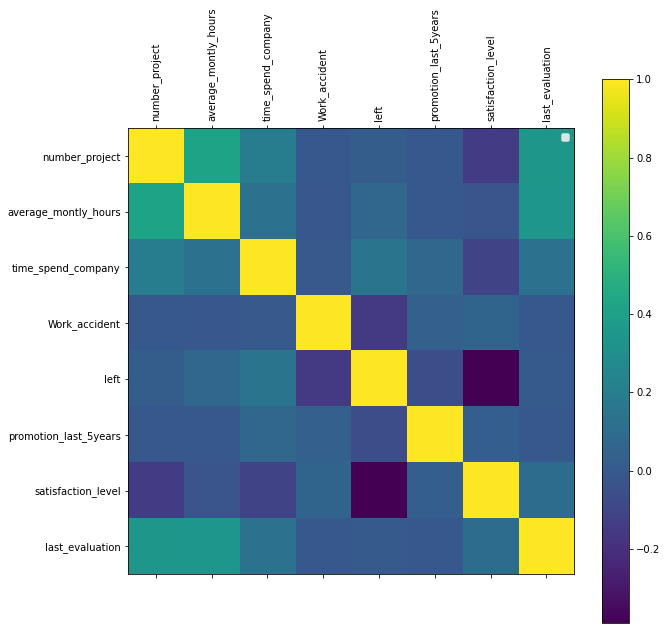

In [32]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    '''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

## Preparing out  Dataset for ML

In [33]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [34]:
# How many columns do we have now?

len(main_df_final.columns)

19

In [35]:
# How many employees in the dataset have left?

len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [36]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [37]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

## Preparing our Dataset for Machine Learning

In [39]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values


In [40]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.
# fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by the transform, but more efficiently implemented.

In [42]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.649764,-0.815352,4.452889,-0.410174,-0.146636,1.401164,-0.673216,-0.233538,-0.232402,-0.225723,-0.21235,-0.246848,-0.252445,-0.619233,2.387481,-0.472776,-0.983281,1.157753
1,-1.463151,-1.596626,-1.025703,-0.410174,-0.146636,-0.523133,-0.615014,4.281959,-0.232402,-0.225723,-0.21235,-0.246848,-0.252445,-0.619233,-0.418852,-0.472776,-0.983281,1.157753
2,-0.649764,-0.995646,-0.340879,-0.410174,-0.146636,-0.643401,-0.964228,-0.233538,-0.232402,-0.225723,-0.21235,-0.246848,-0.252445,1.614901,-0.418852,-0.472776,-0.983281,1.157753
3,-0.649764,-1.015678,-1.025703,-0.410174,6.819589,-0.242506,-0.265799,-0.233538,-0.232402,-0.225723,-0.21235,-0.246848,-0.252445,1.614901,-0.418852,-0.472776,1.017003,-0.863742
4,-0.649764,0.847359,-1.025703,-0.410174,-0.146636,-0.082148,-1.197038,4.281959,-0.232402,-0.225723,-0.21235,-0.246848,-0.252445,-0.619233,-0.418852,-0.472776,1.017003,-0.863742


In [43]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-6.090946e-17,2.678324e-16,-1.580262e-16,-8.391971e-17,4.466694e-17,3.701603e-14,1.486056e-14,2.165670e-17,1.082835e-17,-2.030315e-17,7.444490e-18,5.380336e-17,-3.722245e-17,9.474806e-18,3.045473e-17,5.177304e-17,4.195985e-17,1.001622e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.463151e+00,-2.097442e+00,-1.025703e+00,-4.101744e-01,-1.466364e-01,-2.086624e+00,-2.070074e+00,-2.335380e-01,-2.324019e-01,-2.257232e-01,-2.123501e-01,-2.468475e-01,-2.524450e-01,-6.192332e-01,-4.188516e-01,-4.727759e-01,-9.832810e-01,-8.637420e-01
25%,-6.497644e-01,-8.954823e-01,-3.408791e-01,-4.101744e-01,-1.466364e-01,-7.235805e-01,-9.060257e-01,-2.335380e-01,-2.324019e-01,-2.257232e-01,-2.123501e-01,-2.468475e-01,-2.524450e-01,-6.192332e-01,-4.188516e-01,-4.727759e-01,-9.832810e-01,-8.637420e-01
50%,1.636226e-01,-3.407785e-02,-3.408791e-01,-4.101744e-01,-1.466364e-01,1.182996e-01,2.521313e-02,-2.335380e-01,-2.324019e-01,-2.257232e-01,-2.123501e-01,-2.468475e-01,-2.524450e-01,-6.192332e-01,-4.188516e-01,-4.727759e-01,-9.832810e-01,-8.637420e-01
75%,9.770095e-01,8.874246e-01,3.439448e-01,-4.101744e-01,-1.466364e-01,8.399111e-01,8.982496e-01,-2.335380e-01,-2.324019e-01,-2.257232e-01,-2.123501e-01,-2.468475e-01,-2.524450e-01,1.614901e+00,-4.188516e-01,-4.727759e-01,1.017003e+00,1.157753e+00
max,2.603783e+00,2.189548e+00,4.452889e+00,2.437988e+00,6.819589e+00,1.561523e+00,1.654881e+00,4.281959e+00,4.302891e+00,4.430205e+00,4.709204e+00,4.051083e+00,3.961259e+00,1.614901e+00,2.387481e+00,2.115167e+00,1.017003e+00,1.157753e+00


## Let's Train a Logistic Regression Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.76%
[[3207  208]
 [ 703  382]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3415
           1       0.65      0.35      0.46      1085

    accuracy                           0.80      4500
   macro avg       0.73      0.65      0.67      4500
weighted avg       0.78      0.80      0.77      4500



# Test your model on a single new row of data

In [45]:
# Create Test Input 
# Enter your values here

input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)
print(input_data)
# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)
print(input_data)
# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# print probabilities of belonging to either class
model.predict_proba(input_data)

[[-0.64976438 -0.8153517   1.0287688  -0.41017437  6.8195885  -0.44295379
  -1.25524032 -0.23353795 -0.2324019  -0.22572317 -0.21235012  4.05108343
  -0.25244498 -0.61923318 -0.41885156 -0.47277592 -0.98328099  1.15775314]]
[[-0.64976438 -0.8153517   1.0287688  -0.41017437  6.8195885  -0.44295379
  -1.25524032 -0.23353795 -0.2324019  -0.22572317 -0.21235012  4.05108343
  -0.25244498 -0.61923318 -0.41885156 -0.47277592 -0.98328099  1.15775314]]


C:\Users\huyho\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.89201758, 0.10798242]])

### Let's Try a Random Forest Classifer

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.93%
[[3407    8]
 [  40 1045]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3415
           1       0.99      0.96      0.98      1085

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [48]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [49]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [50]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.293856
0,0.201934
2,0.186058
1,0.156867
6,0.120868
16,0.008483
3,0.007339
15,0.003953
17,0.003533
13,0.003467


### Can Deep Learning Make a Difference?

In [52]:
# Use the newest version of TensorFlow 2.0
%tensorflow_version 2.x 

UsageError: Line magic function `%tensorflow_version` not found.


In [53]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [54]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 171       
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [55]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 5s 4ms/step - loss: 0.4540 - accuracy: 0.7626 - val_loss: 0.3604 - val_accuracy: 0.7589
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3345 - accuracy: 0.8225 - val_loss: 0.3131 - val_accuracy: 0.8671
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2921 - accuracy: 0.8895 - val_loss: 0.2800 - val_accuracy: 0.9113
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2653 - accuracy: 0.9132 - val_loss: 0.2608 - val_accuracy: 0.9184
Epoch 5/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2493 - accuracy: 0.9209 - val_loss: 0.2477 - val_accuracy: 0.9229
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2373 - accuracy: 0.9227 - val_loss: 0.2404 - val_accuracy: 0.9260
Epoch 7/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2278 - accuracy: 0.9263 - val_loss: 0.2300 - val_accuracy:

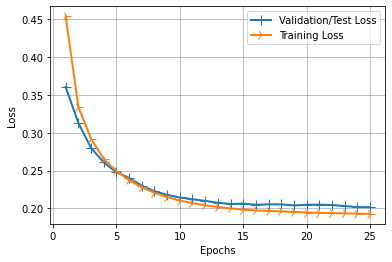

In [56]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

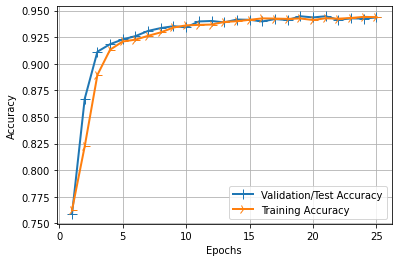

In [57]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Displaying the Classification Report and Confusion Matrix

In [58]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 2ms/step
[[3283  132]
 [ 122  963]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3415
           1       0.88      0.89      0.88      1085

    accuracy                           0.94      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500



# Let's a Deeper Model

In [59]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 270)               5130      
                                                                 
 dropout (Dropout)           (None, 270)               0         
                                                                 
 dense_3 (Dense)             (None, 180)               48780     
                                                                 
 dropout_1 (Dropout)         (None, 180)               0         
                                                                 
 dense_4 (Dense)             (None, 90)                16290     
                                                                 
 dense_5 (Dense)             (None, 1)                 91        
                                                                 
Total params: 70,291
Trainable params: 70,291
Non-trai

In [60]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training our Deeper Model

In [61]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.6457 - accuracy: 0.9068 - val_loss: 0.2938 - val_accuracy: 0.9376
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2790 - accuracy: 0.9389 - val_loss: 0.2623 - val_accuracy: 0.9533
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2636 - accuracy: 0.9408 - val_loss: 0.2431 - val_accuracy: 0.9496
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2524 - accuracy: 0.9440 - val_loss: 0.2488 - val_accuracy: 0.9480
Epoch 5/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2504 - accuracy: 0.9438 - val_loss: 0.2353 - val_accuracy: 0.9576
Epoch 6/25
1050/1050 [==============================] - 4s 3ms/step - loss: 0.2448 - accuracy: 0.9438 - val_loss: 0.2503 - val_accuracy: 0.9458
Epoch 7/25
1050/1050 [==============================] - 4s 4ms/step - loss: 0.2420 - accuracy: 0.9456 - val_loss: 0.2293 - val_accuracy:

In [62]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

141/141 [==============================] - 0s 2ms/step
[[3341   74]
 [ 129  956]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3415
           1       0.93      0.88      0.90      1085

    accuracy                           0.95      4500
   macro avg       0.95      0.93      0.94      4500
weighted avg       0.95      0.95      0.95      4500

